Analyzed index: 1
Analyzed index: 2
Analyzed index: 3
Analyzed index: 4
Analyzed index: 5
Analyzed index: 6
Analyzed index: 7
Analyzed index: 8
Analyzed index: 9
Analyzed index: 10
Analyzed index: 11
Analyzed index: 12
Analyzed index: 13
Analyzed index: 14
Analyzed index: 15
Analyzed index: 16
Request error for https://static.criteo.net/: 404 Client Error: Not Found for url: https://static.criteo.net/
Analyzed index: 17
Analyzed index: 18
Analyzed index: 19
Request error for : No connection adapters were found for ''
Analyzed index: 20
Analyzed index: 21
Analyzed index: 22
Analyzed index: 23
Analyzed index: 24
Analyzed index: 25
Analyzed index: 26
Analyzed index: 27
Analyzed index: 28
Analyzed index: 29
Analyzed index: 30
Analyzed index: 31
Analyzed index: 32
Analyzed index: 33
Analyzed index: 34
Analyzed index: 35
Analyzed index: 36
Analyzed index: 37
Analyzed index: 38
Analyzed index: 39
Analyzed index: 40
Analyzed index: 41
Analyzed index: 42
Analyzed index: 43
Analyzed index: 44
An
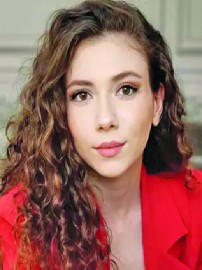
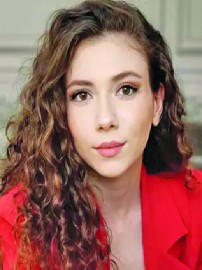

In [2]:
import json
import requests
from PIL import Image
from io import BytesIO
import xml.etree.ElementTree as ET

def load_image_data_from_json(filename='image_data.json'):
    with open(filename, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

def get_image_dimensions(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # for bad responses

        # check if content type header is present and handle SVG content
        content_type = response.headers.get('Content-Type', '')
        if 'svg' in content_type:
            # parse SVG to extract width and height
            tree = ET.fromstring(response.content)
            width = tree.attrib.get('width')
            height = tree.attrib.get('height')
            dimensions = (width, height)
            return dimensions
        elif 'image' in content_type:
            # handle raster images
            image = Image.open(BytesIO(response.content))
            return (image.width, image.height)
        else:
            return 'Unsupported content type'

    except requests.RequestException as e:
        print(f"Request error for {image_url}: {e}")
        return None
    except IOError as e:
        print(f"Image loading error for {image_url}: {e}")
        return None
    except ET.ParseError as e:
        print(f"SVG parsing error for {image_url}: {e}")
        return 'Error parsing SVG'

def save_images_with_dimensions_and_alt_to_html(image_data, filename='images_with_dimensions_and_alt.html'):
    html_content = '<html><head><title>Image Details</title></head><body><h1>Image Details</h1><ul>'
    for index, item in enumerate(image_data, start=1):
        url = item['url']
        alt_text = item['alt']
        dimensions = item.get('dimensions')
        if dimensions:
            if isinstance(dimensions, tuple):
                width, height = dimensions
                html_content += f'<li>{index}. <a href="{url}" target="_blank">{url}</a> - {width}x{height} - Alt Text: {alt_text}</li>'
            else:
                html_content += f'<li>{index}. <a href="{url}" target="_blank">{url}</a> - {dimensions} - Alt Text: {alt_text}</li>'
        else:
            html_content += f'<li>{index}. <a href="{url}" target="_blank">{url}</a> - Error loading image - Alt Text: {alt_text}</li>'
    html_content += '</ul></body></html>'
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(html_content)

def main():
    image_data = load_image_data_from_json()
    for index, item in enumerate(image_data, start=1):
        dimensions = get_image_dimensions(item['url'])
        item['dimensions'] = dimensions
        print(f"Analyzed index: {index}")

    save_images_with_dimensions_and_alt_to_html(image_data)

if __name__ == "__main__":
    main()
